LINK VIDIO : https://binusianorg-my.sharepoint.com/personal/evelyn_untariady_binus_ac_id/_layouts/15/guestaccess.aspx?share=EUk35XrqSOlMsQYLkSsqDqABwrHosbDt6QdkqmA8p3nflw&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=PlL5Pc

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [96]:
df = pd.read_csv('AP003.csv')
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


In [97]:
df = pd.read_csv('AP003.csv',parse_dates=['From Date', 'To Date'])
df.set_index('From Date', inplace=True)
df.drop(columns=['To Date'], inplace=True)

In [98]:
df.head()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
From Date,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,0.58,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
2017-07-01 01:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,0.45,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2017-07-01 02:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,0.53,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
2017-07-01 03:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,0.75,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
2017-07-01 04:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


# [LO1, LO2, LO4 – 5 poin] Exploratory data analysis untuk mengenali data anda. Anda akan menjelaskan EDA apa yang anda lakukan dan informasi apa yang anda peroleh dengan EDA tersebut, serta alasan mengapa anda perlu mengetahui informasi tersebut.

## Cek Tipe Data

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50400 entries, 2017-07-01 00:00:00 to 2023-03-31 23:00:00
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PM2.5 (ug/m3)    44691 non-null  float64
 1   PM10 (ug/m3)     45018 non-null  float64
 2   NO (ug/m3)       46252 non-null  float64
 3   NO2 (ug/m3)      45705 non-null  float64
 4   NOx (ppb)        47040 non-null  float64
 5   NH3 (ug/m3)      45756 non-null  float64
 6   SO2 (ug/m3)      43604 non-null  float64
 7   CO (mg/m3)       46993 non-null  float64
 8   Ozone (ug/m3)    45309 non-null  float64
 9   Benzene (ug/m3)  46678 non-null  float64
 10  Toluene (ug/m3)  46678 non-null  float64
 11  Temp (degree C)  46335 non-null  float64
 12  RH (%)           46520 non-null  float64
 13  WS (m/s)         46522 non-null  float64
 14  WD (degree)      44710 non-null  float64
 15  SR (W/mt2)       47045 non-null  float64
 16  BP (mmHg)        43680 

Dari hasil di atas, dapat dilihat bahwa terdapat 21 kolom dengan tipe data float dan jumlah row sebanyak 50400 data yang terindeks dari  2017-07-01 00:00:00 sampai 2023-03-31 23:00:00.

Dapat dilihat juga bahwa semua kolom fitur memiliki missing value.

In [100]:
print(df.describe())

       PM2.5 (ug/m3)  PM10 (ug/m3)    NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)  \
count   44691.000000  45018.000000  46252.000000  45705.000000  47040.000000   
mean       46.869591    111.938589     14.817678     34.921808     29.857413   
std        35.201161     74.285923     22.372042     23.912796     27.042412   
min         0.250000      1.000000      0.030000      0.030000      0.000000   
25%        23.415000     63.330000      2.915000     18.400000     12.670000   
50%        38.750000     97.750000      6.600000     30.300000     22.910000   
75%        62.330000    137.500000     17.300000     43.900000     36.930000   
max       840.000000    904.000000    419.780000    420.200000    408.250000   

        NH3 (ug/m3)   SO2 (ug/m3)    CO (mg/m3)  Ozone (ug/m3)  \
count  45756.000000  43604.000000  46993.000000   45309.000000   
mean      13.813287     12.323789      0.666865      29.118732   
std       14.685377     10.266289      0.550187      29.388645   
min        0.02

Dapat dilihat bahwa :

1. Kolom PM2.5, PM10, NO, NH3, SO2, Xylene, dan Benzene memiliki distribusi yang skewed dan outlier yang ekstrim yang ditandai dengan nilai max yang jauh dari nilai mean dan Q3

2. Range value dari masing - masing kolom berbeda - beda. Hal ini menunjukkan diperlukannya proses scaling sebelum modeling.

3. Di kolom VWS terdapat dirty data berupa nilai negatif


## Handle Missing Value

In [101]:
df.isna().sum().sort_values(ascending=False)

,0
SO2 (ug/m3),6796
BP (mmHg),6720
PM2.5 (ug/m3),5709
WD (degree),5690
PM10 (ug/m3),5382
Ozone (ug/m3),5091
NO2 (ug/m3),4695
NH3 (ug/m3),4644
NO (ug/m3),4148
Temp (degree C),4065


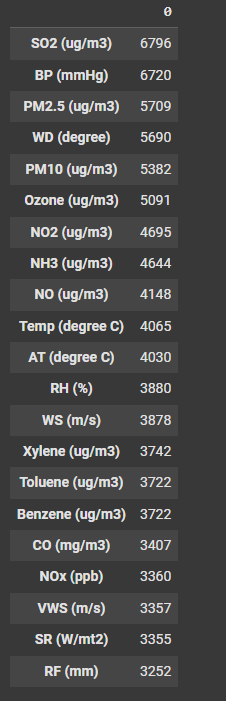

In [102]:
for item in df.columns:
    print(item, df[item].isna().mean() * 100)

PM2.5 (ug/m3) 11.327380952380953
PM10 (ug/m3) 10.678571428571429
NO (ug/m3) 8.230158730158731
NO2 (ug/m3) 9.31547619047619
NOx (ppb) 6.666666666666667
NH3 (ug/m3) 9.214285714285714
SO2 (ug/m3) 13.484126984126984
CO (mg/m3) 6.759920634920635
Ozone (ug/m3) 10.101190476190476
Benzene (ug/m3) 7.384920634920634
Toluene (ug/m3) 7.384920634920634
Temp (degree C) 8.065476190476192
RH (%) 7.698412698412699
WS (m/s) 7.694444444444444
WD (degree) 11.28968253968254
SR (W/mt2) 6.656746031746032
BP (mmHg) 13.333333333333334
VWS (m/s) 6.660714285714285
AT (degree C) 7.996031746031745
RF (mm) 6.4523809523809526
Xylene (ug/m3) 7.424603174603174


Dikarenakan persentase missing value di semua kolom masih cenderung kecil (dengan mayoritas < 10%) akan dilakukan imputasi dibandingkan drop missing value.

### Imputasi

In [103]:
df = df.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')

/tmp/ipython-input-103-1225629578.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')


## Visualisasi

### Tren Suhu Udara per Jam

<Axes: title={'center': 'Tren Suhu Udara per Jam'}, xlabel='From Date'>

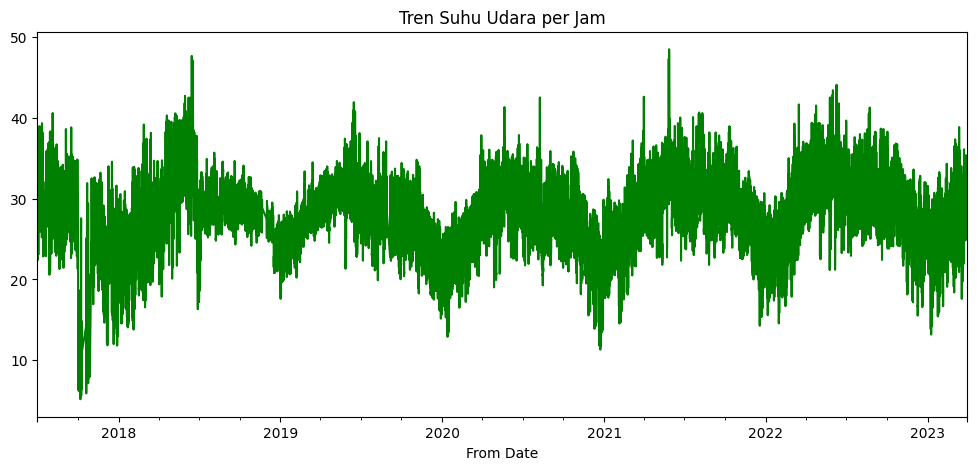

In [104]:
df['AT (degree C)'].plot(figsize=(12,5),color = 'green', title='Tren Suhu Udara per Jam')

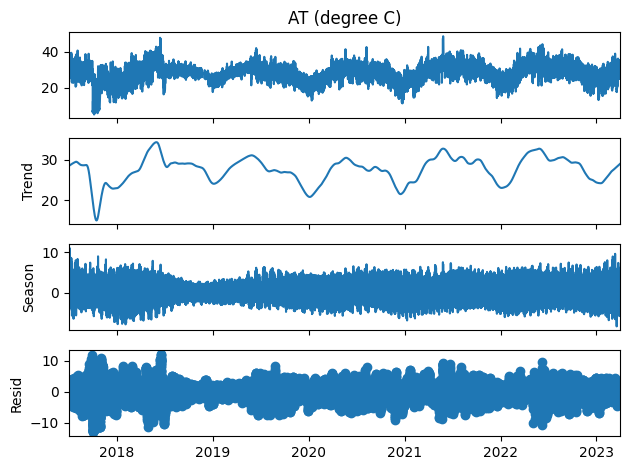

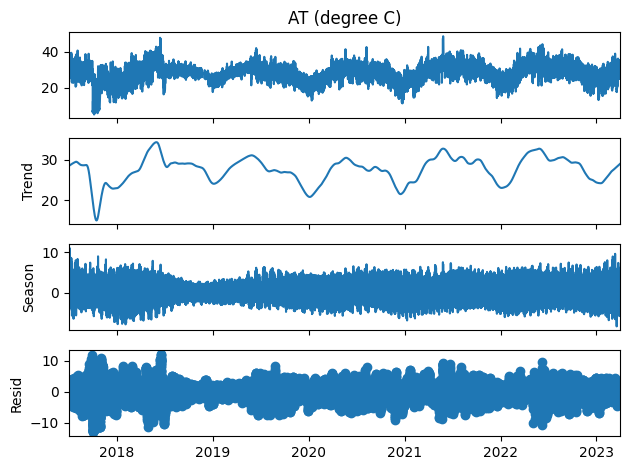

In [105]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['AT (degree C)'], period=24*30)
result = stl.fit()
result.plot()


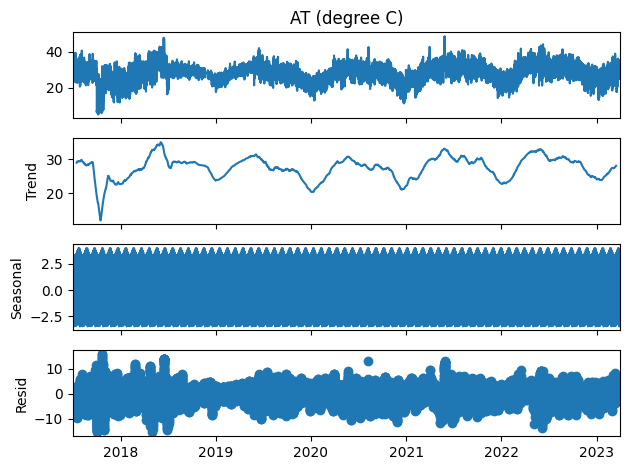

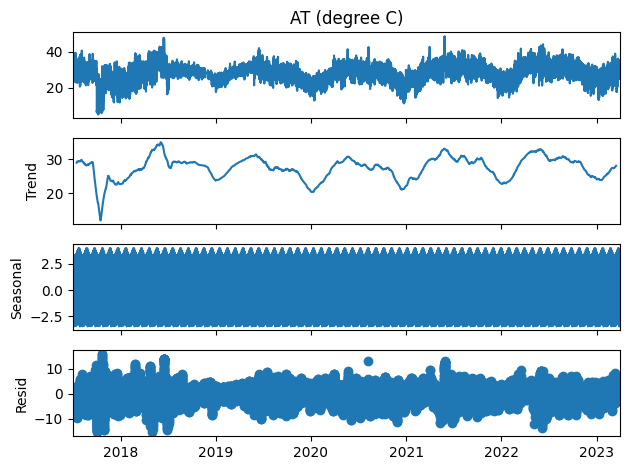

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['AT (degree C)'], model='additive', period=24 * 30)
result.plot()


Dari hasil di atas, dapat dilihat bahwa tren suhu udara menunjukkan pola naik turun kecil dengan kecenderungan meningkat perlahan - lahan sejak tahun 2017 hingga 2023.

### Korelasi antar fitur

<Axes: >

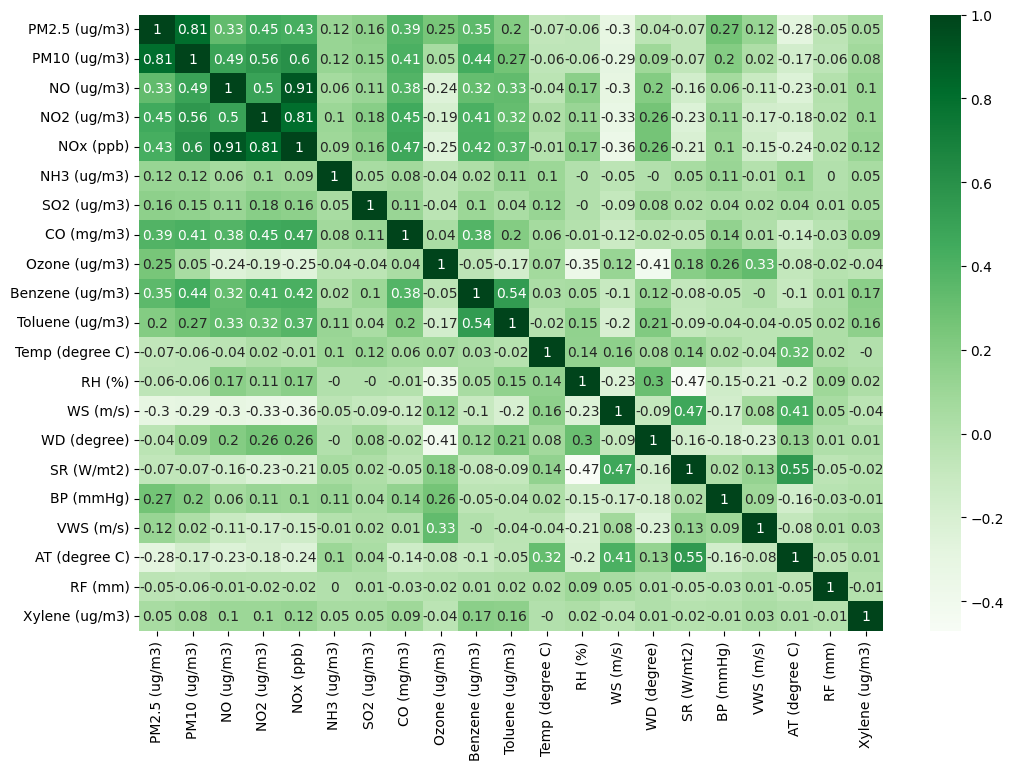

In [107]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(np.round(df.corr(), 2), annot=True, cmap='Greens')

Dapat dilihat bahwa terdapat beberapa fitur yang memiliki korelasi yang tinggi dengan kolom target (AT) seperti, SR (Solar Radiation), WS (Wind Speed) dan Temp

Terdapat pula beberapa fitur yang memiliki korelasi yang tinggi antara satu dan lainnya seperti NOx dan NO, PM2.5 dan PM10, NOx dan NO2

### Cek Distribusi

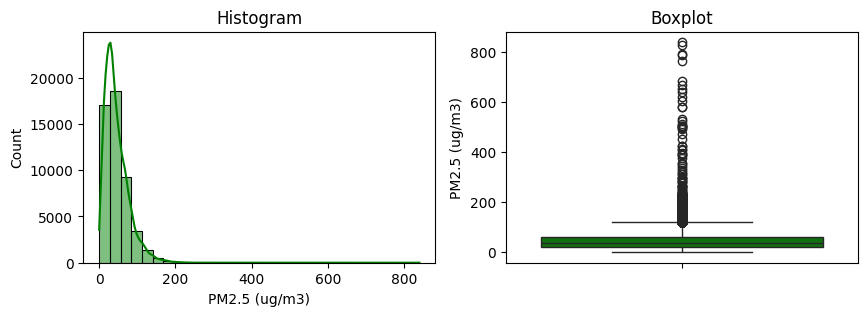

Skewness: 3.7081252785984358
Kurtosis: 46.99260542130959


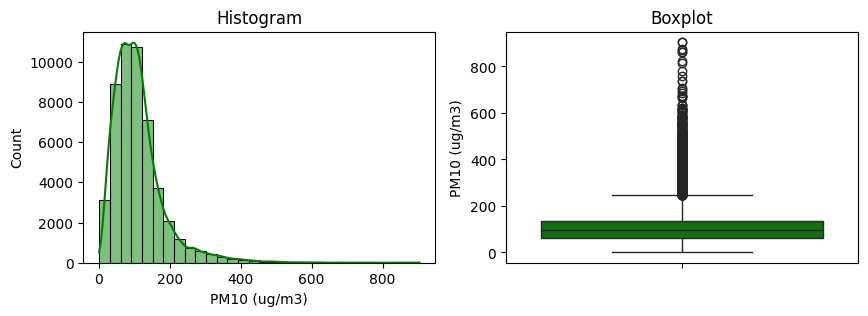

Skewness: 2.125214993159353
Kurtosis: 8.26104577514663


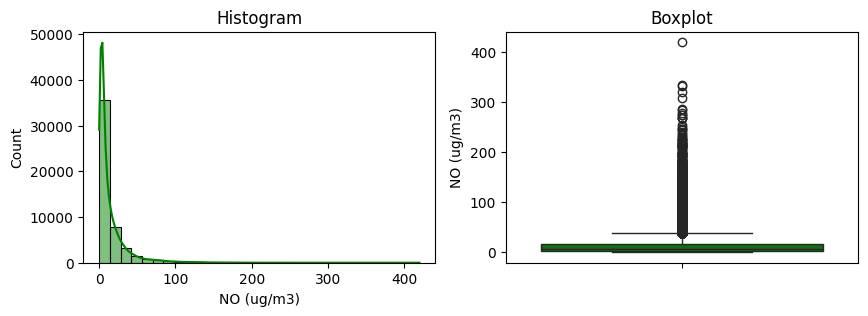

Skewness: 4.049061348321995
Kurtosis: 26.045663870324734


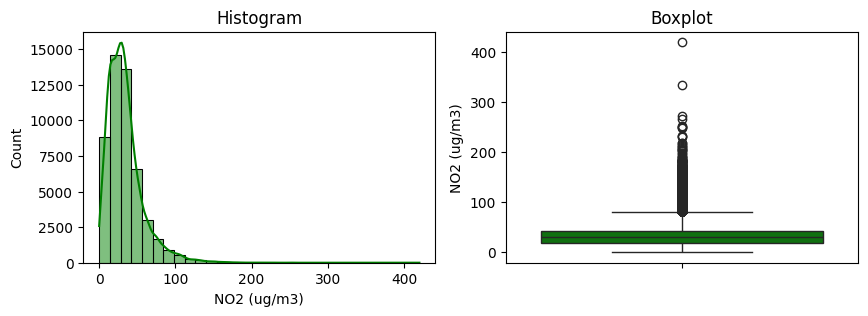

Skewness: 1.9183140410376451
Kurtosis: 7.63255501391998


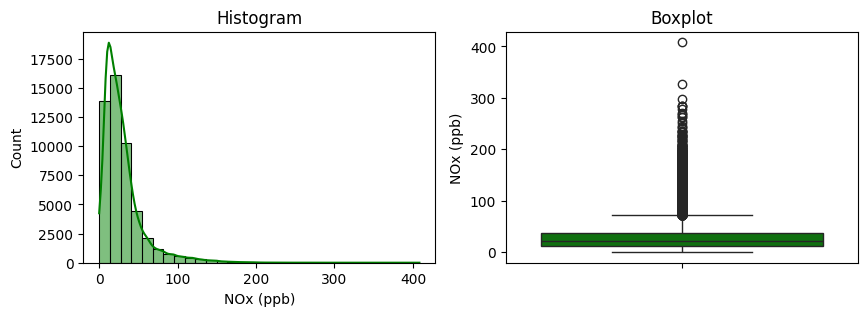

Skewness: 2.6000439984184314
Kurtosis: 10.585103497798977


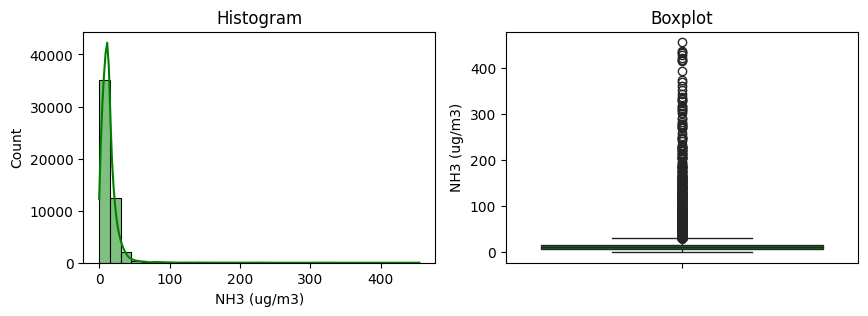

Skewness: 10.457374858496394
Kurtosis: 190.02585748791998


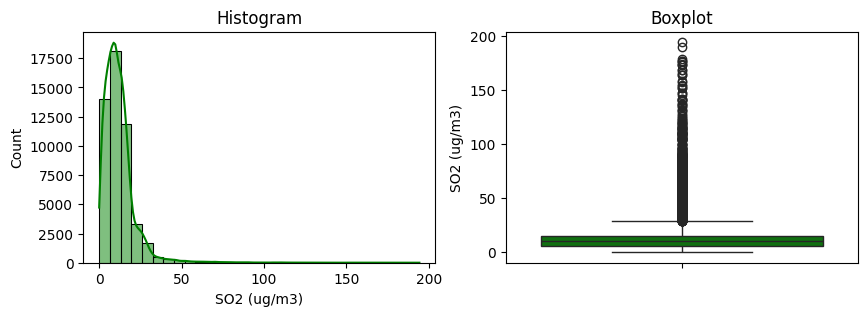

Skewness: 4.60842244667458
Kurtosis: 42.300606593943435


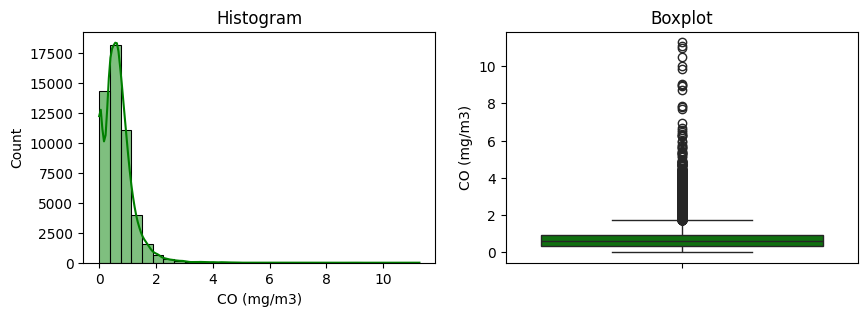

Skewness: 3.0447114420789756
Kurtosis: 28.134694377384967


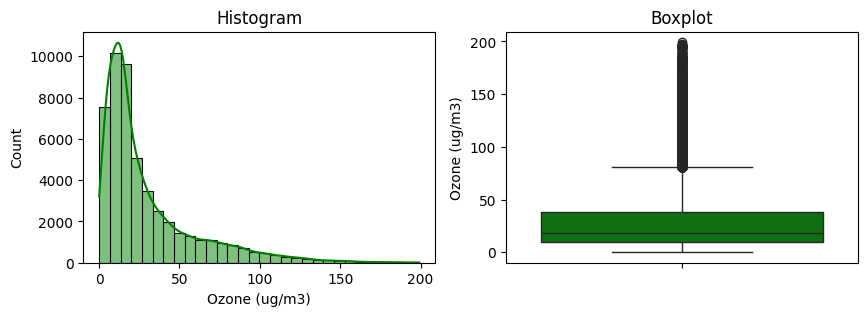

Skewness: 1.8736741139666064
Kurtosis: 3.6921575476001114


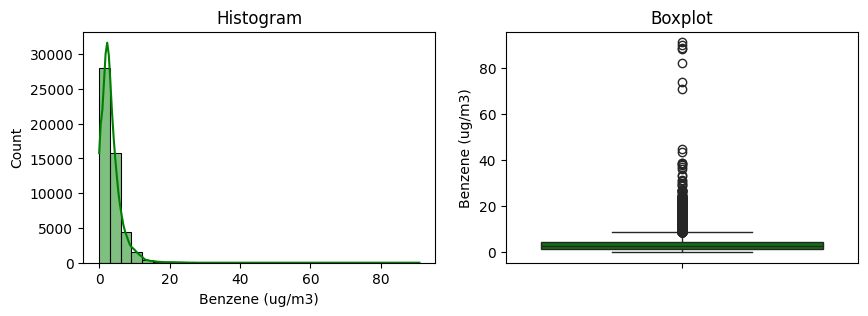

Skewness: 4.6174092442077015
Kurtosis: 81.17820884724094


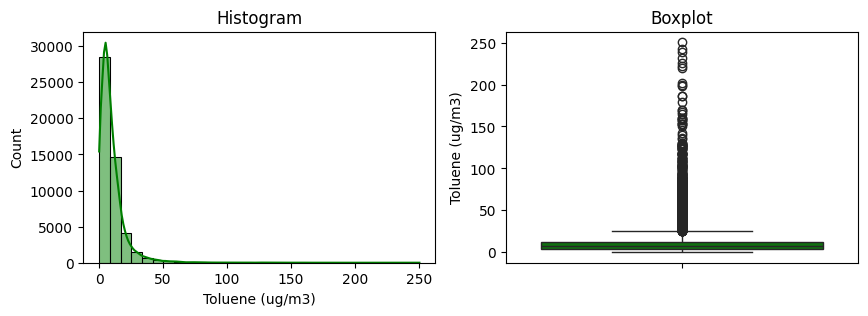

Skewness: 5.143650949111778
Kurtosis: 55.81568192426517


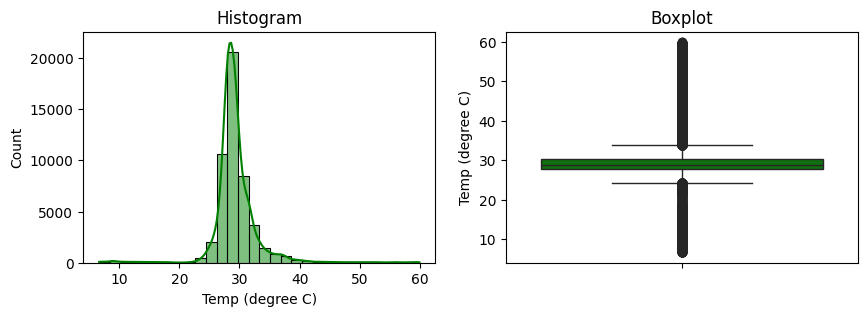

Skewness: 1.0590416926514843
Kurtosis: 16.8071100050782


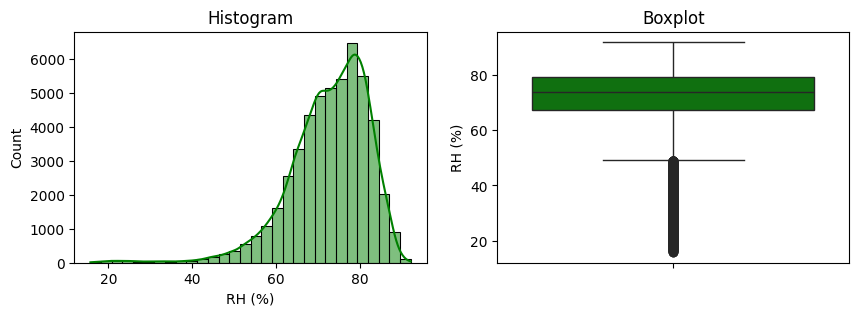

Skewness: -1.2961126879198372
Kurtosis: 3.587987714894181


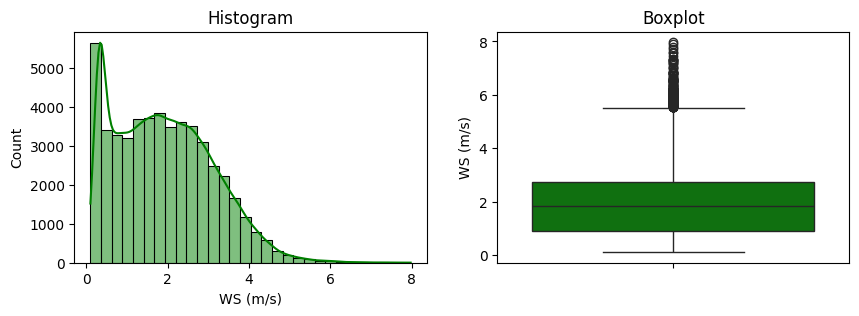

Skewness: 0.5104229336214181
Kurtosis: -0.18883164263512864


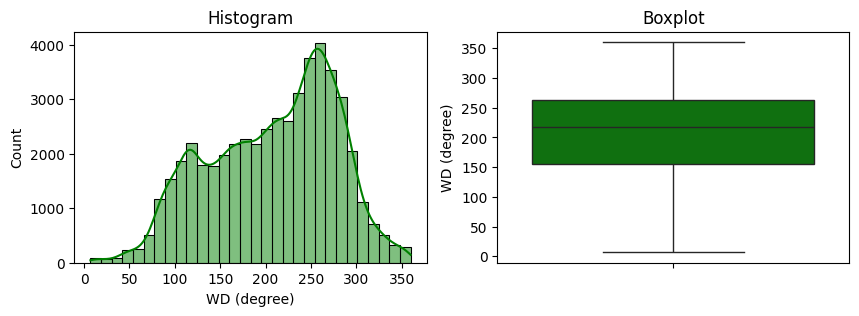

Skewness: -0.3192174373468651
Kurtosis: -0.7503227071758536


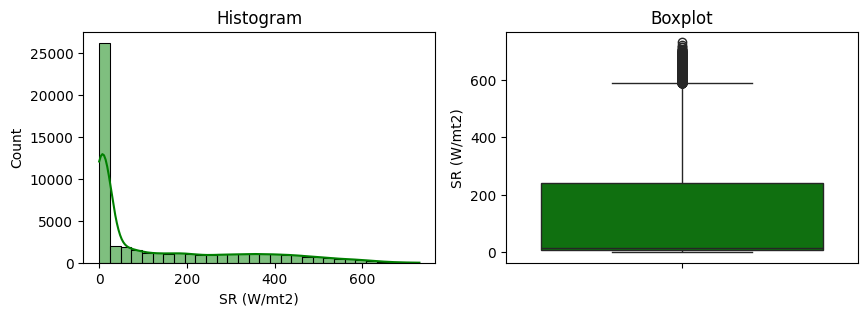

Skewness: 1.207609428565322
Kurtosis: 0.18546988386185914


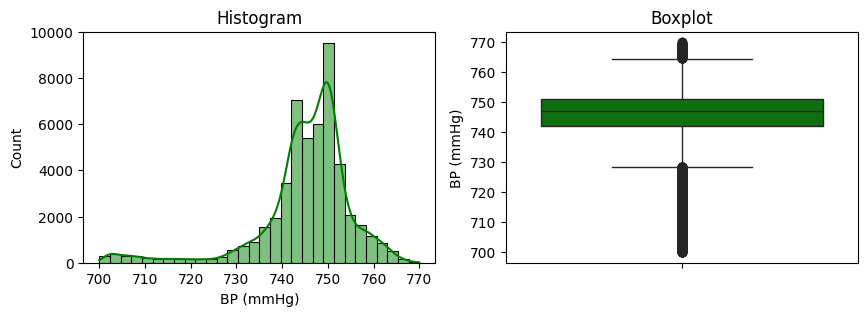

Skewness: -1.825211949413162
Kurtosis: 5.1410140498137356


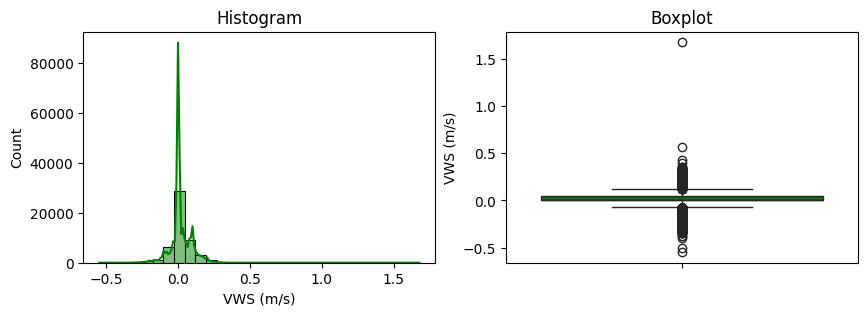

Skewness: 0.35043276054444655
Kurtosis: 8.303341094034884


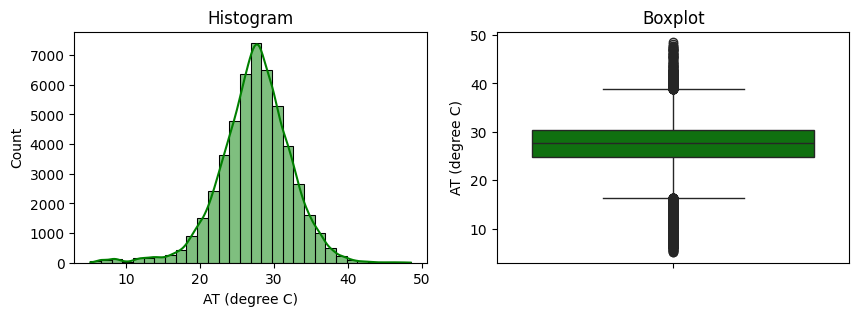

Skewness: -0.4942500898003309
Kurtosis: 1.7376913487677634


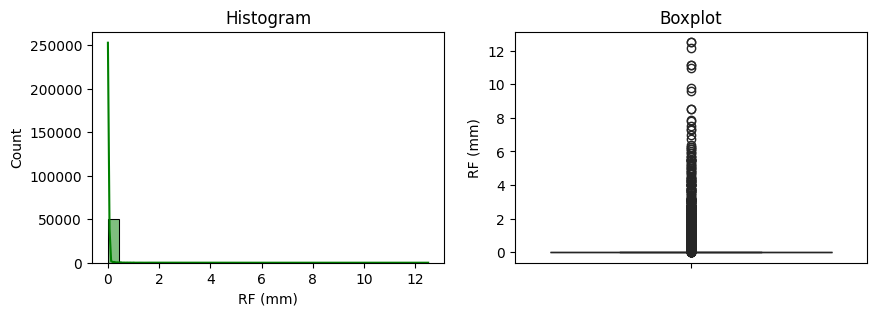

Skewness: 21.969369934268567
Kurtosis: 640.4916616459097


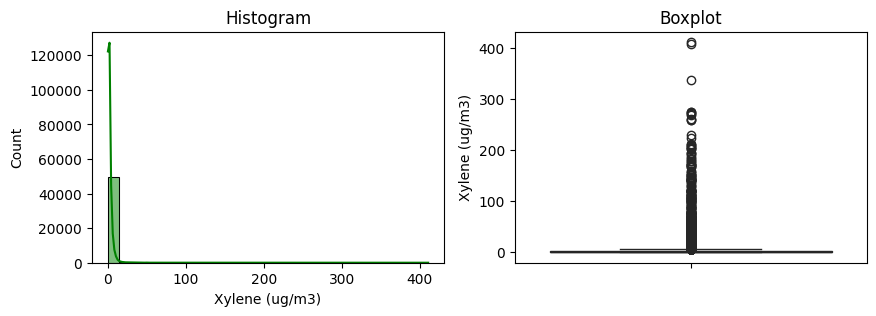

Skewness: 20.437939026817205
Kurtosis: 581.6355796611186


In [108]:
def check_dist(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True, color = 'green')
        plt.title('Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col], color = 'green')
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_dist(df, df.columns)

Dapat dilihat bahwa terdapat beberapa kolom yang memiliki distribusi cenderung normal seperti AT, WD, Temp. Sedangkan kolom lainnya memiliki distribusi tidak normal dengan skewness di range > 0.5

Kita perlu mengetahui distribusi masing - masing fitur agar dapat memilih scaler yang tepat untuk fitur tersebut.

# [LO1, LO2, LO4 – 5 poin] Untuk pemodelan, anda perlu untuk membagi data menjadi 80% training, 10% validasi dan 10% testing, kemudian melakukan pre-processing data dengan mempersiapkan input-output yang akan digunakan untuk memprediksi kondisi kualitas udara (AT) 1 jam kedepan menggunakan data di 5 jam sebelumnya.

## Split Train Test Data

In [109]:
train_size, val_size ,test_size = 0.8, 0.1, 0.1

df_train = df[:int(len(df)*(1-val_size-test_size))]
df_val = df[int(len(df)*(1-val_size-test_size)):int(len(df)*(1-test_size))]
df_test = df[int(len(df)*(1-test_size)):]

print(df_train.shape, df_val.shape, df_test.shape)

(40320, 21) (5040, 21) (5040, 21)


In [110]:
target_col = 'AT (degree C)'

X_train = df_train.drop(columns=[target_col])
y_train = df_train[[target_col]]

X_val = df_val.drop(columns=[target_col])
y_val = df_val[[target_col]]

X_test = df_test.drop(columns=[target_col])
y_test = df_test[[target_col]]


In [111]:
from statsmodels.tsa.stattools import pacf
lags = np.abs(pacf(df['AT (degree C)'], nlags=365))
important_lags = np.where(lags > 0.3)[0]

In [112]:
print(important_lags)

[0 1 2]


Lag paling signifikan adalah lag ke 0, 1 dan 2

### Scaling

In [113]:
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler()
y_scaler = RobustScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)


In [114]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_train_scaled[target_col] = y_train_scaled

df_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
df_val_scaled[target_col] = y_val_scaled

df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
df_test_scaled[target_col] = y_test_scaled

In [125]:
def generate_windowed_samples(data, target_col, window_size=30):
    X, y = [], []
    target_index = data.columns.get_loc(target_col)
    data_np = data.values
    for i in range(len(data_np) - window_size):
        X.append(data_np[i:i + window_size])
        y.append(data_np[i + window_size][target_index])
    return np.array(X), np.array(y)

In [126]:
window_size = 5

x_train_fin, y_train_fin = generate_windowed_samples(df_train_scaled, target_col, window_size)
x_val_fin, y_val_fin = generate_windowed_samples(df_val_scaled, target_col, window_size)
x_test_fin, y_test_fin = generate_windowed_samples(df_test_scaled, target_col, window_size)
print(x_train_fin.shape, y_train_fin.shape)
print(x_val_fin.shape, y_val_fin.shape)
print(x_test_fin.shape, y_test_fin.shape)


(40315, 5, 21) (40315,)
(5035, 5, 21) (5035,)
(5035, 5, 21) (5035,)


# [LO1, LO2, LO3, LO4 – 7 poin] Membangun model LSTM dengan hidden size 10 , dan regressor single layer dengan fungsi aktivasi linear .

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [133]:
baseline_model = Sequential([
    LSTM(10, input_shape=(x_train_fin.shape[1], x_train_fin.shape[2])),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [134]:
baseline_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [135]:
baseline_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

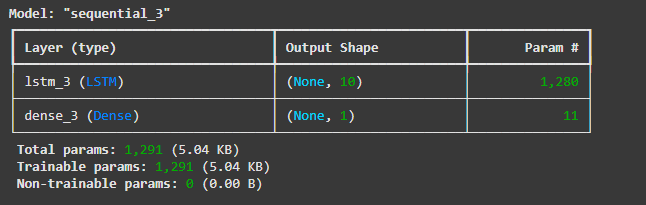

In [136]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [138]:
history1 = baseline_model.fit(
    x_train_fin, y_train_fin,
    validation_data=(x_val_fin, y_val_fin),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0917 - mae: 0.2154 - val_loss: 0.0382 - val_mae: 0.1364
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0292 - mae: 0.1137 - val_loss: 0.0313 - val_mae: 0.1179
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0240 - mae: 0.0995 - val_loss: 0.0279 - val_mae: 0.1130
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0213 - mae: 0.0929 - val_loss: 0.0260 - val_mae: 0.1098
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0219 - mae: 0.0916 - val_loss: 0.0264 - val_mae: 0.1081
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0217 - mae: 0.0903 - val_loss: 0.0255 - val_mae: 0.1105
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0199 - mae: 0.0883 - val_loss: 0.0252 - val_mae: 0.1076
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0194 - mae: 0.0881 - val_loss: 0.0248 - val_mae: 0.1057
Epoch 9/50
1260/1260 ━━━━━━━━━━━━━━━━

In [139]:
import matplotlib.pyplot as plt

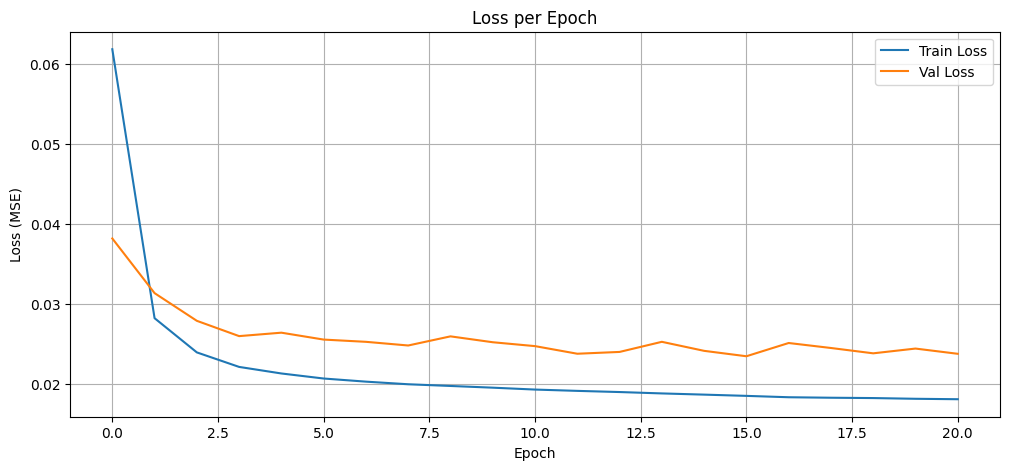

In [140]:
plt.figure(figsize=(12,5))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

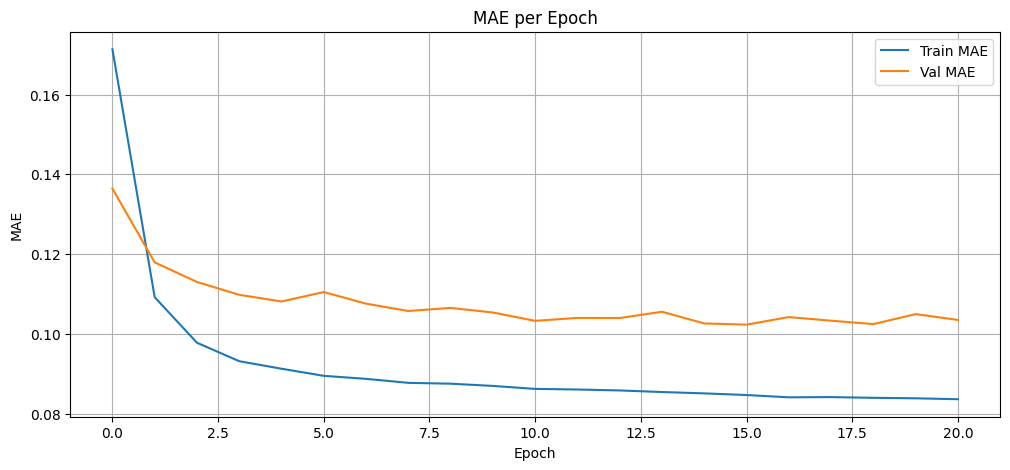

In [141]:
plt.figure(figsize=(12,5))
plt.plot(history1.history['mae'], label='Train MAE')
plt.plot(history1.history['val_mae'], label='Val MAE')
plt.title('MAE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
y_pred_scaled = baseline_model.predict(x_test_fin)

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [143]:
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_fin.reshape(-1, 1))

# [LO1, LO2, LO3, LO4 – 5 point] Modifikasi model LSTM baseline (c), anda dapat mengubah arsitektur atau melakukan hyperparameter tuning.

In [147]:
from tensorflow.keras.layers import Dropout
model_modif = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train_fin.shape[1], x_train_fin.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
from tensorflow.keras.optimizers import Adam
model_modif.compile(optimizer= Adam(learning_rate = 0.001), loss='mse', metrics=['mae'])

In [149]:
history_modif = model_modif.fit(
    x_train_fin, y_train_fin,
    validation_data=(x_val_fin, y_val_fin),
    epochs = 50,
    batch_size = 32,
    callbacks = [early_stop],
    verbose = 1
)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.1493 - mae: 0.2609 - val_loss: 0.0317 - val_mae: 0.1258
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0323 - mae: 0.1220 - val_loss: 0.0262 - val_mae: 0.1122
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0255 - mae: 0.1066 - val_loss: 0.0285 - val_mae: 0.1195
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0232 - mae: 0.1022 - val_loss: 0.0252 - val_mae: 0.1081
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0237 - mae: 0.1002 - val_loss: 0.0254 - val_mae: 0.1064
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0226 - mae: 0.0984 - val_loss: 0.0249 - val_mae: 0.1065
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0211 - mae: 0.0964 - val_loss: 0.0251 - val_mae: 0.1048
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0203 - mae: 0.0947 - val_loss: 0.0259 - val_mae: 0.1056
Epoch 9/50
1260/1260 ━━━━━━━━

In [150]:
y_pred_modif_scaled = model_modif.predict(x_test_fin)
y_pred_modif = y_scaler.inverse_transform(y_pred_modif_scaled)
y_true_modif = y_scaler.inverse_transform(y_test_fin.reshape(-1, 1))

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


# [LO2, LO3, LO4 – 3 point] Lakukan evaluasi terhadap model baseline (c) dan model modifikasi (d) dengan menghitung MAE, MSE dan R2 Score, jelaskan analisa anda.

## Baseline Model

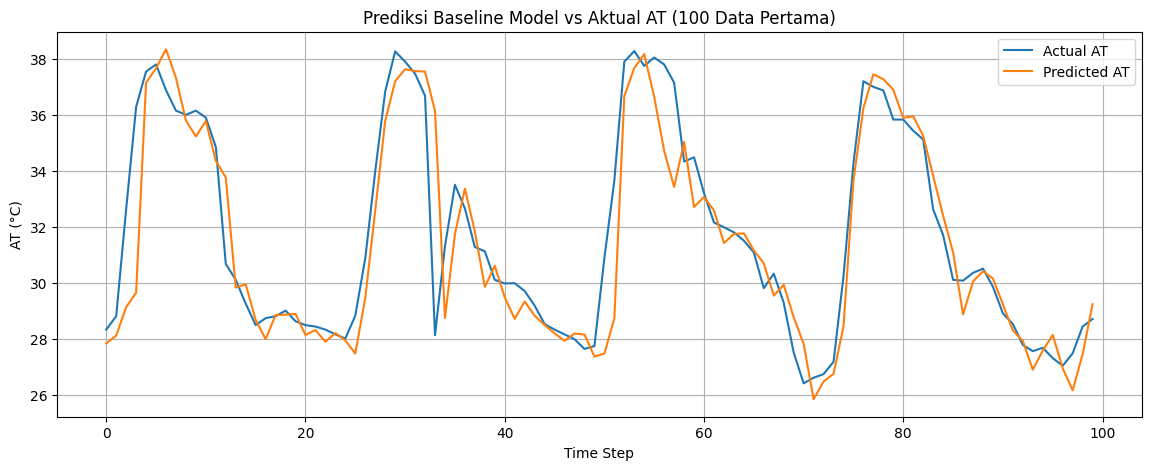

In [157]:
plt.figure(figsize=(14,5))
plt.plot(y_true[:100], label='Actual AT')
plt.plot(y_pred[:100], label='Predicted AT')
plt.title('Prediksi Baseline Model vs Aktual AT (100 Data Pertama)')
plt.xlabel('Time Step')
plt.ylabel('AT (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test MAE: {mae:.3f} °C")
print(f"Test RMSE: {rmse:.3f} °C")
print(f"Test R2: {r2:.3f} °C")


Test MAE: 0.564 °C
Test RMSE: 0.702 °C
Test R2: 0.957 °C


Model sudah sangat bagus karena :
1. Memiliki R2 yang tinggi (0.957) yang berarti model dapat menjelaskan 0.957 bagian dari keselurahan data target.

2. Nilai RMSE dari model kecil (0.702) yang berarti prediksi cenderung meleset sekitar 0.702 °C

3. Nilai MAE dari model sangat kecil (0.564) yang berarti rata - rata prediksi model hanya meleset 0.564 °C dari nilai sebenarnya.

## Modif Model

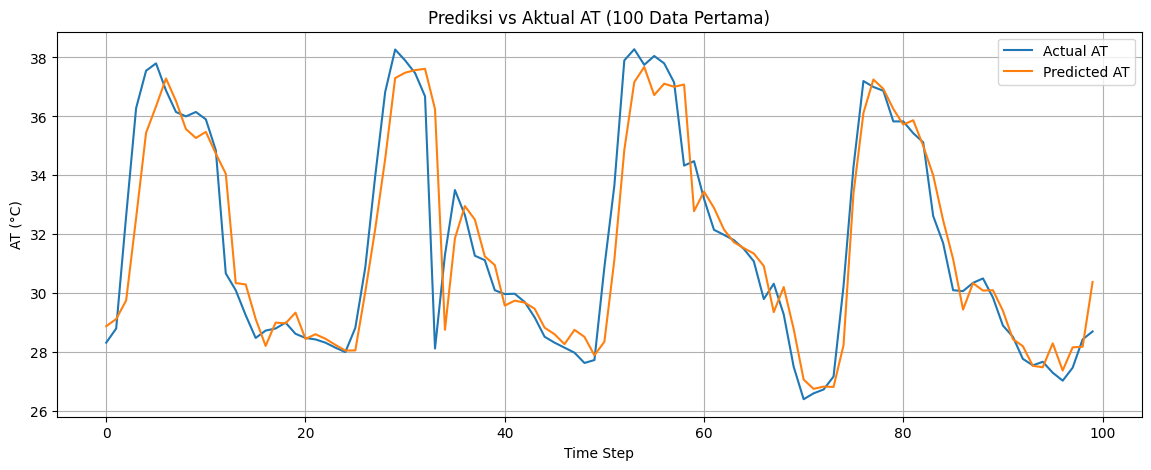

In [156]:
plt.figure(figsize=(14,5))
plt.plot(y_true_modif[:100], label='Actual AT')
plt.plot(y_pred_modif[:100], label='Predicted AT')
plt.title('Prediksi vs Aktual AT (100 Data Pertama)')
plt.xlabel('Time Step')
plt.ylabel('AT (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
mae_modif = mean_absolute_error(y_true_modif, y_pred_modif)
rmse_modif = mean_squared_error(y_true_modif, y_pred_modif)
r2_modif = r2_score(y_true_modif, y_pred_modif)

print(f"Test MAE: {mae_modif:.3f} °C")
print(f"Test RMSE: {rmse_modif:.3f} °C")
print(f"Test R2: {r2_modif:.3f} °C")

Test MAE: 0.580 °C
Test RMSE: 0.695 °C
Test R2: 0.958 °C


Model sudah sangat bagus karena :
1. Memiliki R2 yang tinggi (0.958) yang berarti model dapat menjelaskan 0.958 bagian dari keselurahan data target.

2. Nilai RMSE dari model kecil (0.695) yang berarti prediksi cenderung meleset sekitar 0.695 °C

3. Nilai MAE dari model sangat kecil (0.580) yang berarti rata - rata prediksi model hanya meleset 0.580 °C dari nilai sebenarnya.

**Kesimpulan : Model yang setelah dimodifikasi arsitekturnya memiliki error yang lebih kecil dan dapat menjelaskan data target dengan lebih baik dibanding baseline model**

# [LO1, LO2, LO3, LO4 – 5 poin] Pertanyaan Bonus, apakah problem ini mungkin menggunakan time series multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban anda untuk problem ini

Masalah ini sangat mungkin untuk diselesaikan dengan multivariate time series dikarenakan variabel target(AT) dipengaruhi oleh banyak variabel lain yang juga berubah terhadap waktu, seperti fitur PM2.5, NO2, CO, RH, WS, SR dan BP. Jika hanya menggunakan nilai AT masa lalu (univariate), model dapat kehilangan informasi penting dari variabel-variabel lainnya. Dengan menggunakan lebih dari satu variabel sebagai input, model multivariate dapat mempelajari hubungan yang lebih kompleks antar variabel terhadap target secara lebih akurat, sehingga memberikan hasil prediksi yang lebih baik.